# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Loading Data

In [4]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')
data.shape

(109248, 9)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [5]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [6]:
#Train test cv split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y) 
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
print(X_train.shape) 
print(X_cv.shape) 
print(X_test.shape)

(49041, 8)
(24155, 8)
(36052, 8)


In [7]:
print(X_train.dtypes)

school_state                                     object
teacher_prefix                                   object
project_grade_category                           object
teacher_number_of_previously_posted_projects      int64
clean_categories                                 object
clean_subcategories                              object
essay                                            object
price                                           float64
dtype: object


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### bow essay

In [15]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) 

# using fit to transform
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorisations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorisations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


### tf idf essay

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=25)
vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape)
print(X_cv_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(49041, 8264)
(24155, 8264)
(36052, 8264)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### encoding `teacher_number_of_previously_posted_projects`

In [8]:
from sklearn.preprocessing import Normalizer
normodel = Normalizer()

normodel.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_no_prev_posted_pro = normodel.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_no_prev_posted_pro = normodel.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_no_prev_posted_pro = normodel.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After Vectorization")
print(X_train_no_prev_posted_pro.shape, y_train.shape)
print(X_cv_no_prev_posted_pro.shape, y_cv.shape)
print(X_test_no_prev_posted_pro.shape, y_test.shape)

After Vectorization
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### encoding `price`

In [9]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### encoding `school_state `

In [10]:
vecmodel = CountVectorizer()
vecmodel.fit(X_train['school_state'].values) #fit on train data set

#we use fiited countvectorizer to convert the text to vector
X_train_school_state_ohe = vecmodel.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vecmodel.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vecmodel.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_school_state_ohe.shape,y_train.shape)
print(X_cv_school_state_ohe.shape,y_cv.shape)
print(X_test_school_state_ohe.shape,y_test.shape)
print(vecmodel.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### encoding `teacher_prefix `

In [11]:
vecmodel = CountVectorizer()
vecmodel.fit(X_train['teacher_prefix'].values) #fit on train data set

#we use fiited countvectorizer to convert the text to vector
X_train_teachpre_ohe = vecmodel.transform(X_train['teacher_prefix'].values)
X_cv_teachpre_ohe = vecmodel.transform(X_cv['teacher_prefix'].values)
X_test_teachpre_ohe = vecmodel.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teachpre_ohe.shape,y_train.shape)
print(X_cv_teachpre_ohe.shape,y_cv.shape)
print(X_test_teachpre_ohe.shape,y_test.shape)
print(vecmodel.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### encoding `project_grade_category` 

In [12]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### encoding `clean_categories`

In [13]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_cv_categories_ohe.shape, y_cv.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### encoding `clean_subcategories`

In [14]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
print(X_cv_subcategories_ohe.shape, y_cv.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### function used in all below predictions

In [18]:
def batch_predict(clf, data):
    # roc auc score (y true , y score) the second parameter should be probabilty estimates of +ve class
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    #consider your X_tr shape is 49041 then your tr_loop will be 49000
    #in this for loop we will iterate untill the last 1000 multipler
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [24]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr

def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr) is", max(tpr*(1-fpr)), "for theshold ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions= []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## Case 1 : BOW NB

In [17]:
from scipy.sparse import hstack
X_tr = hstack((X_train_categories_ohe, X_train_essay_bow, X_train_grade_ohe, X_train_no_prev_posted_pro, \
              X_train_price_norm, X_train_school_state_ohe, X_train_subcategories_ohe, X_train_teachpre_ohe)).tocsr()
X_cr = hstack((X_cv_categories_ohe,X_cv_essay_bow,X_cv_grade_ohe, X_cv_no_prev_posted_pro, X_cv_price_norm, \
              X_cv_school_state_ohe, X_cv_subcategories_ohe, X_cv_teachpre_ohe)).tocsr()
X_te = hstack((X_test_categories_ohe, X_test_essay_bow, X_test_grade_ohe, X_test_no_prev_posted_pro, X_test_price_norm\
              , X_test_school_state_ohe, X_test_subcategories_ohe, X_test_teachpre_ohe)).tocsr()

print("Fianal data Matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Fianal data Matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


100%|██████████| 4/4 [01:06<00:00, 16.57s/it]


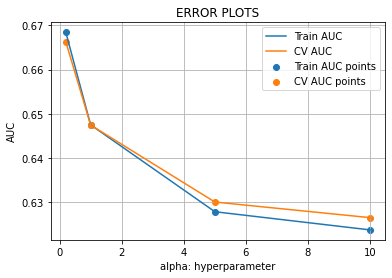

In [22]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
alpha = [0.2, 1, 5, 10]
for i in tqdm(alpha):
    neigh = GaussianNB(var_smoothing=i)
    neigh.fit(X_tr.toarray(), y_train)
    
    y_train_pred = batch_predict(neigh, X_tr.toarray())
    y_cv_pred = batch_predict(neigh, X_cr.toarray())
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
    
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

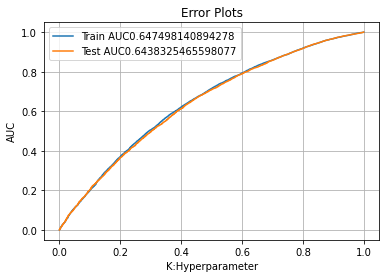

In [23]:
from sklearn.metrics import roc_curve, auc

neigh = GaussianNB(var_smoothing=1)
neigh.fit(X_tr.toarray(),y_train)

y_train_pred = batch_predict(neigh, X_tr.toarray())
y_test_pred = batch_predict(neigh, X_te.toarray())

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label='Train AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test AUC'+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("K:Hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plots")
plt.grid()
plt.show()

In [25]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train Confusion matric")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) is 0.3733611126760285 for theshold  0.756
Train Confusion matric
[[ 4427  2999]
 [15552 26063]]
Test confusion matrix
[[ 3193  2266]
 [11257 19336]]


## Case 2: Tf idf NB

In [26]:
##concat
from scipy.sparse import hstack
X_tr = hstack((X_train_categories_ohe, X_train_essay_tfidf, X_train_grade_ohe, X_train_no_prev_posted_pro, \
              X_train_price_norm, X_train_school_state_ohe, X_train_subcategories_ohe, X_train_teachpre_ohe)).tocsr()
X_cr = hstack((X_cv_categories_ohe, X_cv_essay_tfidf, X_cv_grade_ohe, X_cv_no_prev_posted_pro, X_cv_price_norm, \
              X_cv_school_state_ohe, X_cv_subcategories_ohe, X_cv_teachpre_ohe)).tocsr()
X_te = hstack((X_test_categories_ohe, X_test_essay_tfidf, X_test_grade_ohe, X_test_no_prev_posted_pro, X_test_price_norm\
              , X_test_school_state_ohe, X_test_subcategories_ohe, X_test_teachpre_ohe)).tocsr()

print("Fianal data Matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Fianal data Matrix
(49041, 8365) (49041,)
(24155, 8365) (24155,)
(36052, 8365) (36052,)


100%|██████████| 4/4 [02:24<00:00, 36.11s/it]


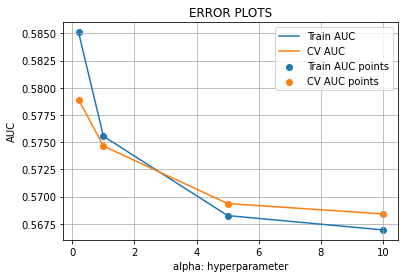

In [27]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
alpha = [0.2, 1, 5, 10]
for i in tqdm(alpha):
    neigh = GaussianNB(var_smoothing=i)
    neigh.fit(X_tr.toarray(), y_train)
    
    y_train_pred = batch_predict(neigh, X_tr.toarray())
    y_cv_pred = batch_predict(neigh, X_cr.toarray())
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
    
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

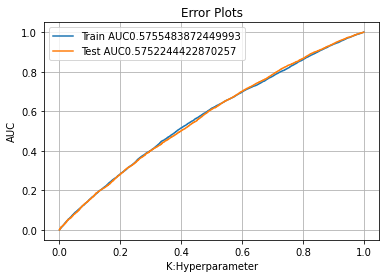

In [28]:
from sklearn.metrics import roc_curve, auc

neigh = GaussianNB(var_smoothing=1)
neigh.fit(X_tr.toarray(),y_train)

y_train_pred = batch_predict(neigh, X_tr.toarray())
y_test_pred = batch_predict(neigh, X_te.toarray())

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label='Train AUC'+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label='Test AUC'+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("K:Hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plots")
plt.grid()
plt.show()

In [29]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train Confusion matric")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) is 0.31138341573176376 for theshold  0.853
Train Confusion matric
[[ 4113  3313]
 [18219 23396]]
Test confusion matrix
[[ 2966  2493]
 [13447 17146]]


## feature_log_prob_ multinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_tr.toarray(),y_train)

print(abs(clf.feature_log_prob_))
print(clf.feature_count_)

[[4.93244376 7.92391163 4.90193113 ... 3.54828843 3.85179817 6.38043169]
 [5.05269527 7.11041128 4.85635323 ... 3.45502511 3.86357903 6.71789515]]
[[  935.    46.   964. ...  3735.  2757.   219.]
 [ 4461.   569.  5429. ... 22048. 14653.   843.]]


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [32]:
from prettytable import PrettyTable
pt = PrettyTable()

pt.field_names = ["Vectorizer","Model", "Hyperparameter", "AUC"]
pt.add_rows(
    [
        ["BOW","Bruteforce","alpha=1",0.64383],
        ["TF IDF","BruteForce","alpha=1",0.57522],
    ]
)
print(pt)

+------------+------------+----------------+---------+
| Vectorizer |   Model    | Hyperparameter |   AUC   |
+------------+------------+----------------+---------+
|    BOW     | Bruteforce |    alpha=1     | 0.64383 |
|   TF IDF   | BruteForce |    alpha=1     | 0.57522 |
+------------+------------+----------------+---------+
